# Cleaning and data transformation

## Import the necessary libraries

In [1]:
import pandas as pd

import numpy as np

import statsmodels.api as sm

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

## Import the data

In [3]:
# Import the CSV with the raw scraped data of the products

food = pd.read_csv("/Users/david/Desktop/IronHack/Projects/food_advisor/data/raw/n1_300.csv")

In [4]:
# Explore the data

food.head()

,Unnamed: 0,Product Name,Brands,NOVA 4,Nutri-Score,Countries,Additives,Eco-Score,Energía,Grasas saturadas,Azúcares
0,0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [5]:
food.shape

(29800, 11)

In [6]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29800 entries, 0 to 29799
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        29800 non-null  int64 
 1   Product Name      29799 non-null  object
 2   Brands            29800 non-null  object
 3   NOVA 4            29800 non-null  object
 4   Nutri-Score       29800 non-null  object
 5   Countries         29800 non-null  object
 6   Additives         29800 non-null  object
 7   Eco-Score         29800 non-null  object
 8   Energía           27655 non-null  object
 9   Grasas saturadas  27651 non-null  object
 10  Azúcares          27652 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


# Data cleaning

In [7]:
# Delete the column "Unnamed: 0"

food.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
# Check for duplicated rows

food[food.duplicated()].shape

(108, 10)

In [9]:
# Delete duplicated rows

food.drop_duplicates(inplace=True)


In [10]:
# Check duplicated rows again

food[food.duplicated()].shape

(0, 10)

In [11]:
food.shape

(29692, 10)

In [12]:
food.head()

,Product Name,Brands,NOVA 4,Nutri-Score,Countries,Additives,Eco-Score,Energía,Grasas saturadas,Azúcares
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [13]:
# Convert column names to snake case and lowercase

food.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

In [14]:
food.head()

,product_name,brands,nova_4,nutri-score,countries,additives,eco-score,energía,grasas_saturadas,azúcares
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [15]:
# Modify column names

food.rename(columns={
    "grasas_saturadas": "saturated_fats",
    "azúcares": "sugars",
    "energía": "energy",
    "additives":"product_additives"
}, inplace=True)

In [16]:
food.head()

,product_name,brands,nova_4,nutri-score,countries,product_additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [17]:
# Check for duplicated rows based on "product name"

food[food.duplicated(subset=['product_name'])].shape

(623, 10)

In [18]:
# Delete duplicated rows based on "product name"

food.drop_duplicates(subset=['product_name'], keep='first', inplace=True)

food.shape

(29069, 10)

In [19]:
# Split the "product_name" column into "product_name" and "weight"

food[['product', 'weight']] = food['product_name'].str.rsplit(' - ', n=1, expand=True)

food.drop("product_name", axis=1, inplace=True)

food.rename(columns={"product": "product_name"}, inplace=True)

food.head()

,brands,nova_4,nutri-score,countries,product_additives,eco-score,energy,saturated_fats,sugars,product_name,weight
0,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g",Nutella - Ferrero,400 g
1,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g,Prince chocolate - Lu,300 g
2,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g",Coca-Cola,330 mL
3,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g",Nutella - Ferrero,1 kg
4,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g,Coca-Cola zero,330 ml


In [20]:
# Check for duplicated rows based on "product" column

food[food.duplicated(subset=['product_name'])].shape


(2221, 11)

In [21]:
# Delete duplicated rows based on "product" column

food.drop_duplicates(subset=['product_name'], keep='first', inplace=True)

In [22]:
food.shape

(26848, 11)

In [23]:
# Delete the "countries" and "weight" columns

food.drop("countries", axis=1, inplace=True)
food.drop("weight", axis=1, inplace=True)


food.head()

,brands,nova_4,nutri-score,product_additives,eco-score,energy,saturated_fats,sugars,product_name
0,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g",Nutella - Ferrero
1,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g,Prince chocolate - Lu
2,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g",Coca-Cola
4,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g,Coca-Cola zero
5,"Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,2158 kj(515 kcal),"11,5 g","35,8 g","Ferrero- Nutella Biscuits Resealable Bag, 304g..."


In [24]:
# Rearrange the "product_name" column

food = food[['product_name'] + [col for col in food.columns if col not in ['product_name']]]

food.head()

,product_name,brands,nova_4,nutri-score,product_additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
4,Coca-Cola zero,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,2158 kj(515 kcal),"11,5 g","35,8 g"


## Manipulating the "brands" column

In [25]:
# Remove "u,n,k,n,o,w,n" from the "brands" column

food["brands"].replace("u, n, k, n, o, w, n", pd.NA, inplace=True)
food.tail()

,product_name,brands,nova_4,nutri-score,product_additives,eco-score,energy,saturated_fats,sugars
29795,Listísimos. Albóndigas con tomate,la sirena,Nivel de procesamiento de alimentos desconocido,UNKNOWN,"u, n, k, n, o, w, n",El Eco-Score no pudo ser calculado,820 kj(196 kcal),"1,3 g",14 g
29796,Cafe nespreso amaha awe UGANDA,<NA>,Nivel de procesamiento de alimentos desconocido,B,"u, n, k, n, o, w, n",El Eco-Score no pudo ser calculado,4 kj(1 kcal),0 g,0 g
29797,Iberogast,<NA>,Nivel de procesamiento de alimentos desconocido,UNKNOWN,"u, n, k, n, o, w, n",El Eco-Score no pudo ser calculado,NaN,NaN,NaN
29798,Setas cultivadas (pleurotus ostreatus),<NA>,Nivel de procesamiento de alimentos desconocido,UNKNOWN,"u, n, k, n, o, w, n",El Eco-Score no pudo ser calculado,NaN,NaN,NaN
29799,Malzgetränk,<NA>,Nivel de procesamiento de alimentos desconocido,UNKNOWN,"u, n, k, n, o, w, n",El Eco-Score no pudo ser calculado,188 kj(45 kcal),"0,1 g",9 g


In [26]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26848 entries, 0 to 29799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name       26847 non-null  object
 1   brands             23757 non-null  object
 2   nova_4             26848 non-null  object
 3   nutri-score        26848 non-null  object
 4   product_additives  26848 non-null  object
 5   eco-score          26848 non-null  object
 6   energy             24949 non-null  object
 7   saturated_fats     24945 non-null  object
 8   sugars             24946 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


## Manipulating the "saturated fats" and "sugars" columns

In [27]:
# Transforme the "saturated fats" and "sugars" columns by removing non-numeric characters

food['saturated_fats'] = food['saturated_fats'].str.replace('<', '').str.replace('g', '')
food['sugars'] = food['sugars'].str.replace('<', '').str.replace('g', '')

In [28]:
# Transforme the "saturated fats" and "sugars" columns by removing empty spaces

food['saturated_fats'] = food['saturated_fats'].str.replace(',', '.').str.replace(' ', '')
food['sugars'] = food['sugars'].str.replace(',', '.').str.replace(' ', '')

In [29]:
# Transforme the "saturated fats" and "sugars" columns by converting values into numeric data type, producing nulls when not possible

food['saturated_fats'] = pd.to_numeric(food['saturated_fats'], errors='coerce')
food['sugars'] = pd.to_numeric(food['sugars'], errors='coerce')

In [30]:
# Convert the "saturated fats" and "sugars" columns to float type

food['saturated_fats'] = food['saturated_fats'].astype(float)
food['sugars'] = food['sugars'].astype(float)

In [31]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26848 entries, 0 to 29799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       26847 non-null  object 
 1   brands             23757 non-null  object 
 2   nova_4             26848 non-null  object 
 3   nutri-score        26848 non-null  object 
 4   product_additives  26848 non-null  object 
 5   eco-score          26848 non-null  object 
 6   energy             24949 non-null  object 
 7   saturated_fats     24632 non-null  float64
 8   sugars             24618 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.0+ MB


In [32]:
food.head()

,product_name,brands,nova_4,nutri-score,product_additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),10.6,56.3
1,Prince chocolate - Lu,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),5.6,32.0
2,Coca-Cola,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0.0,10.6
4,Coca-Cola zero,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0.0,0.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,2158 kj(515 kcal),11.5,35.8


## Manipulating the "energy" column

In [33]:
# Convert the "energy" column to represent energy in Kcal

food['energy'] = food['energy'].str.extract(r'\((\d+) kcal\)', expand=False)

food.head()

,product_name,brands,nova_4,nutri-score,product_additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,539,10.6,56.3
1,Prince chocolate - Lu,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,467,5.6,32.0
2,Coca-Cola,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,42,0.0,10.6
4,Coca-Cola zero,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,0,0.0,0.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,515,11.5,35.8


In [34]:
# Convert the "energy" column to float data type 

food['energy'] = food['energy'].astype(float)

In [35]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26848 entries, 0 to 29799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       26847 non-null  object 
 1   brands             23757 non-null  object 
 2   nova_4             26848 non-null  object 
 3   nutri-score        26848 non-null  object 
 4   product_additives  26848 non-null  object 
 5   eco-score          26848 non-null  object 
 6   energy             24851 non-null  float64
 7   saturated_fats     24632 non-null  float64
 8   sugars             24618 non-null  float64
dtypes: float64(3), object(6)
memory usage: 2.0+ MB


In [36]:
# Explore the correlation among numeric variables

food.corr()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_33916/3861490276.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


,energy,saturated_fats,sugars
energy,1.000000,0.549865,0.284805
saturated_fats,0.549865,1.000000,0.112928
sugars,0.284805,0.112928,1.000000


## Manipulating the "eco-score" column

In [37]:
# Check the unique values in the "eco-score" column

food["eco-score"].unique()

array(['Eco-Score D', 'Eco-Score C', 'Eco-Score aún no aplicable',
       'Eco-Score B', 'Eco-Score A', 'El Eco-Score no pudo ser calculado',
       'Eco-Score E'], dtype=object)

In [38]:
# Transform unknown category values in "eco-score" column into nulls

food["eco-score"] = food["eco-score"].replace("Eco-Score aún no aplicable", np.nan)
food["eco-score"] = food["eco-score"].replace("El Eco-Score no pudo ser calculado", np.nan)

In [39]:
# Reduce text in the "eco-score" column

food["eco-score"] = food["eco-score"].str.replace("Eco-Score A", "A")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score B", "B")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score C", "C")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score D", "D")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score E", "E")


In [40]:
# Create a new numeric column "eco-score_num" for numerical analysis of "eco-score" values

food["eco-score_num"] = food["eco-score"].copy()

In [41]:
# Assign numeric values to the "eco-score" column

food["eco-score_num"] = food["eco-score_num"].str.replace("A", "1")
food["eco-score_num"] = food["eco-score_num"].str.replace("B", "2")
food["eco-score_num"] = food["eco-score_num"].str.replace("C", "3")
food["eco-score_num"] = food["eco-score_num"].str.replace("D", "4")
food["eco-score_num"] = food["eco-score_num"].str.replace("E", "5")

In [42]:
# Transform "nutri-score" values to float data type

food['eco-score_num'] = food['eco-score_num'].astype(float)

In [43]:
print(food["eco-score_num"].unique())
print(sum(food["eco-score_num"].isnull()))

[ 4.  3. nan  2.  1.  5.]
12908


In [44]:
# Delete the columm eco-score"

food.drop("eco-score", axis=1, inplace=True)

## Manipulating the "nutri-score" column

In [45]:
# Check the unique values in the "nutri-score" column

food["nutri-score"].unique()

array(['E', 'D', 'B', 'A', 'C', 'UNKNOWN', 'NOT-APPLICABLE', 'unknown'],
      dtype=object)

In [46]:
# Transform "unknown" category values into nulls in the "nutri-score" column

food["nutri-score"] = food["nutri-score"].replace("UNKNOWN", np.nan)
food["nutri-score"] = food["nutri-score"].replace("NOT-APPLICABLE", np.nan)
food["nutri-score"] = food["nutri-score"].replace("unknown", np.nan)


In [47]:
# Create a new numeric column "nutri-score_num" for numerical analysis of "nutri-score" values

food["nutri-score_num"] = food["nutri-score"].copy()


In [48]:
# Assign numeric values to the "nutri-score" column

food["nutri-score_num"] = food["nutri-score_num"].str.replace("A", "1")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("B", "2")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("C", "3")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("D", "4")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("E", "5")

In [49]:
# Transform "nutri-score" values to float data type

food['nutri-score_num'] = food['nutri-score_num'].astype(float)

In [50]:
print(food["nutri-score_num"].unique())
print(sum(food["nutri-score_num"].isnull()))

[ 5.  4.  2.  1.  3. nan]
7596


In [51]:
# Delete the "nutri-score" column

food.drop("nutri-score", axis=1, inplace=True)

## Manipulating the "nova_4" column

In [52]:
# Check the unique values in the "nova_4" column

food["nova_4"].unique()

array(['Alimentos ultraprocesados',
       'Nivel de procesamiento de alimentos desconocido',
       'Alimentos no procesados o mínimamente procesados',
       'Alimentos procesados', 'Ingredientes culinarios procesados',
       'unknown'], dtype=object)

In [53]:
# Transform unknown category values into nulls in the "nova_4" column

food["nova_4"] = food["nova_4"].replace("Nivel de procesamiento de alimentos desconocido", np.nan)
food["nova_4"] = food["nova_4"].replace("unknown", np.nan)

In [54]:
# Create a new column "nova_4_num"

food["nova_4_num"] = food["nova_4"].copy()


In [55]:
# Assign numeric values to the variable 'nova_4_num

food["nova_4_num"] = food["nova_4_num"].str.replace("Alimentos ultraprocesados", "4")
food["nova_4_num"] = food["nova_4_num"].str.replace("Alimentos procesados", "3")
food["nova_4_num"] = food["nova_4_num"].str.replace("Ingredientes culinarios procesados", "2")
food["nova_4_num"] = food["nova_4_num"].str.replace("Alimentos no procesados o mínimamente procesados", "1")


In [56]:
# Transform values of 'nova_4_num' into the float data type

food['nova_4_num'] = food['nova_4_num'].astype(float)

In [57]:
print(food["nova_4"].unique())
print(sum(food["nova_4"].isnull()))

['Alimentos ultraprocesados' nan
 'Alimentos no procesados o mínimamente procesados' 'Alimentos procesados'
 'Ingredientes culinarios procesados']
13641


In [58]:
print(food["nova_4_num"].unique())
print(sum(food["nova_4_num"].isnull()))

[ 4. nan  1.  3.  2.]
13641


In [59]:
# Delete the columm nova_4"

food.drop("nova_4", axis=1, inplace=True)

In [60]:
# Rename the variable "nova_4_num" to "nova_score_num" to reflect the official name of the index

food.rename(columns={"nova_4_num": "nova_score_num"}, inplace=True)


## Manipulating the "additives" column

In [61]:
# Delete empty spaces between the string values

food['product_additives'] = food['product_additives'].str.replace(' ', '')
food.head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num
0,Nutella - Ferrero,Ferrero,"E322-Lecitinas,E322i-Lecitina",539.0,10.6,56.3,4.0,5.0,4.0
1,Prince chocolate - Lu,"Lu, Mondelez","E322-Lecitinas,E322i-Lecitina,E500-Carbonatosd...",467.0,5.6,32.0,3.0,4.0,4.0
2,Coca-Cola,Coca cola,"E150d-Caramelodesulfitoamónico,E338-Ácidofosfó...",42.0,0.0,10.6,NaN,5.0,4.0
4,Coca-Cola zero,Coca-Cola,"E150d-Caramelodesulfitoamónico,E331-Citratosde...",0.0,0.0,0.0,NaN,2.0,4.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero","u,n,k,n,o,w,n",515.0,11.5,35.8,3.0,5.0,NaN


In [62]:
food.iloc[1]['product_additives']

'E322-Lecitinas,E322i-Lecitina,E500-Carbonatosdesodio,E500ii-Bicarbonatodesodio,E503-Carbonatosdeamonio,E503i-Carbonatodeamonio'

In [63]:
# Leave only the additives codes

food['product_additives'] = food['product_additives'].str.findall(r'(E\d+[a-zA-Z]*)')
food.head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num
0,Nutella - Ferrero,Ferrero,"[E322, E322i]",539.0,10.6,56.3,4.0,5.0,4.0
1,Prince chocolate - Lu,"Lu, Mondelez","[E322, E322i, E500, E500ii, E503, E503i]",467.0,5.6,32.0,3.0,4.0,4.0
2,Coca-Cola,Coca cola,"[E150d, E338]",42.0,0.0,10.6,NaN,5.0,4.0
4,Coca-Cola zero,Coca-Cola,"[E150d, E331, E338, E950, E951]",0.0,0.0,0.0,NaN,2.0,4.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero",[],515.0,11.5,35.8,3.0,5.0,NaN


In [64]:
# Remove any lists from the "additives" column values, keeping only the individual additives. If the list is empty, replace it with a null value.

food['product_additives'] = food['product_additives'].apply(lambda x: ','.join(x) if isinstance(x, list) and x else np.nan if x == [] else x)

food.sample(5)

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num
2895,Velouté de Ceps y Boletus Y un toque de nata f...,"Carrefour, Groupe Carrefour","E14XX,E415",37.0,1.1,0.6,NaN,3.0,4.0
24868,Arbonne feel fit protein,<NA>,NaN,381.0,2.4,6.0,NaN,NaN,NaN
15914,Fideus Orientals Barbacoa Yatekomo Gallina Blanca,Gallina Blanca,NaN,200.0,4.7,2.1,2.0,NaN,NaN
26828,Maloserá,Malosera,"E163,E202,E330,E955",44.0,0.0,10.0,NaN,NaN,4.0
2817,Energy galletas con chocolate Chiquilin - Artiach,Artiach,"E150d,E304,E306,E341,E341i,E471",493.0,4.9,26.0,4.0,4.0,4.0


In [65]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26848 entries, 0 to 29799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       26847 non-null  object 
 1   brands             23757 non-null  object 
 2   product_additives  8124 non-null   object 
 3   energy             24851 non-null  float64
 4   saturated_fats     24632 non-null  float64
 5   sugars             24618 non-null  float64
 6   eco-score_num      13940 non-null  float64
 7   nutri-score_num    19252 non-null  float64
 8   nova_score_num     13207 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [66]:
# Create a new column called "product_additive_count" to count the number of additives for each product

food['product_additive_count'] = food['product_additives'].str.count(',') + 1

food.head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
0,Nutella - Ferrero,Ferrero,"E322,E322i",539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,Prince chocolate - Lu,"Lu, Mondelez","E322,E322i,E500,E500ii,E503,E503i",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,Coca-Cola,Coca cola,"E150d,E338",42.0,0.0,10.6,NaN,5.0,4.0,2.0
4,Coca-Cola zero,Coca-Cola,"E150d,E331,E338,E950,E951",0.0,0.0,0.0,NaN,2.0,4.0,5.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero",NaN,515.0,11.5,35.8,3.0,5.0,NaN,NaN


# Data Transformation

In [67]:
# Examine statistical measurements

food.describe().T

,count,mean,std,min,25%,50%,75%,max
energy,24851.0,270.637318,200.417320,0.0,79.0,260.0,420.00000,3440.0
saturated_fats,24632.0,4.515838,7.420041,0.0,0.2,1.5,5.59325,100.0
sugars,24618.0,11.166076,16.894711,0.0,0.8,3.7,14.00000,105.0
eco-score_num,13940.0,3.024390,1.152660,1.0,2.0,3.0,4.00000,5.0
nutri-score_num,19252.0,3.057968,1.326328,1.0,2.0,3.0,4.00000,5.0
nova_score_num,13207.0,3.342243,1.017307,1.0,3.0,4.0,4.00000,4.0
product_additive_count,8124.0,3.807607,2.865491,1.0,2.0,3.0,5.00000,30.0


## `energy`

<Axes: >

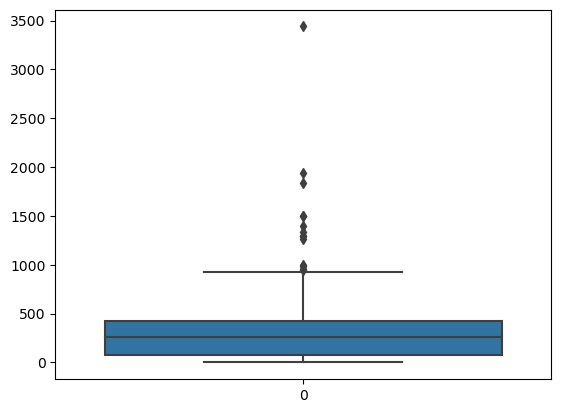

In [68]:
# Plot the energy values to visualize the median, quantiles, and outliers

sns.boxplot(data=food['energy'])

In [69]:
# Check for outliers

k=1.5
# Calculate the quartiles and IQR
Q1 = food['energy'].quantile(0.20)
Q3 = food['energy'].quantile(0.80)
IQR = Q3 - Q1

# Calculate the lower and upper fences
lower_fence = Q1 - k * IQR
upper_fence = Q3 + k * IQR

# Include the outliers in new df
energy_outliers = food[(food['energy'] < lower_fence) | (food['energy']> upper_fence)]
energy_outliers

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
1457,Helices con tomate y espinacas - Gallo,Gallo,NaN,3440.0,0.500,4.000,NaN,1.0,1.0,NaN
5329,María - Gullón,Gullón,"E223,E322,E322i,E502",1837.0,1.000,19.000,3.0,4.0,4.0,4.0
9827,RITZ - Nabisco,Nabisco,"E322,E322i,E341,E341i,E500,E500ii,E503,E503ii",1500.0,6.667,28.667,3.0,5.0,4.0,8.0
12268,Hojuela de avena de grano entero - Quaker,Quaker,NaN,1500.0,1.330,1.330,NaN,1.0,NaN,NaN
12895,5555,<NA>,"E171,E905,E905c,E905ci",1297.0,19.000,16.000,NaN,NaN,4.0,4.0
15706,Márdel Dulce de Leche Pastelero,Márdel,NaN,1331.0,4.100,58.000,1.0,5.0,NaN,NaN
19848,Magdalenas valencianas -,<NA>,NaN,1937.0,2.900,27.400,3.0,5.0,NaN,NaN
22246,Pan con centeno y nueces,Panflor,NaN,1290.0,0.300,5.300,NaN,NaN,NaN,NaN
24631,Jelly Gomis,<NA>,NaN,1400.0,0.000,65.000,NaN,NaN,NaN,NaN
29376,Jamón iberico,Benito,NaN,1267.0,0.000,0.000,5.0,NaN,NaN,NaN


In [70]:
# Delete the ouliers from the column "energy" since looks like the values make no sense

food = food[~food['energy'].isin(energy_outliers['energy'])]


## `saturated_fats` and `sugars`

<Axes: >

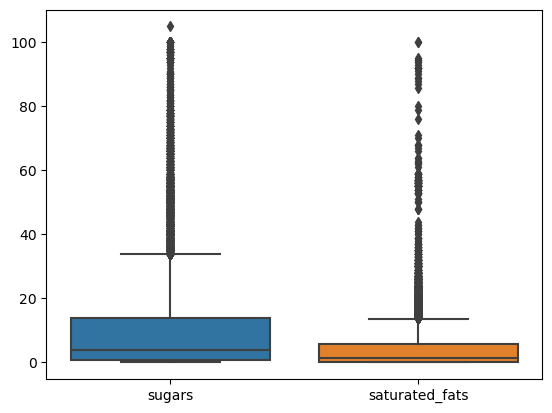

In [71]:
# Plot the saturated_fats values to visualize the median, quantiles, and outliers

sns.boxplot(data=food[['sugars', 'saturated_fats']])


In [72]:
# Check for outliers in "sugars"

k=1.5

# Calculate the quartiles and IQR
Q1 = food['sugars'].quantile(0)
Q3 = food['sugars'].quantile(0.90)
IQR = Q3 - Q1

# Calculate the lower and upper fences
lower_fence = Q1 - k * IQR
upper_fence = Q3 + k * IQR

sugars_outliers = food[(food['sugars'] < lower_fence) | (food['sugars']> upper_fence)]
sugars_outliers.head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
760,Azúcar moreno de caña integral no refinado - A...,Azucarera,NaN,380.0,0.0,95.0,3.0,4.0,2.0,NaN
1065,Panela - Hacendado,Hacendado,NaN,376.0,0.0,94.0,3.0,4.0,2.0,NaN
1090,Azúcar blanco en polvo - CARREFOUR DISCOUNT,"CARREFOUR DISCOUNT, Simply",NaN,400.0,0.0,100.0,1.0,4.0,2.0,NaN
1674,Azúcar moreno de caña - Acor,Acor,NaN,380.0,0.0,95.0,3.0,4.0,2.0,NaN
2019,Panela sin refinar,gourmet latino,NaN,362.0,0.0,90.4,NaN,NaN,NaN,NaN


##### Based on the type of product, the sugar content seems reasonable. We will keep these products


In [73]:
# Check for outliers in "saturated_fats"

k=1.5
# Calculate the quartiles and IQR
Q1 = food['saturated_fats'].quantile(0)
Q3 = food['saturated_fats'].quantile(0.99)
IQR = Q3 - Q1

# Calculate the lower and upper fences
lower_fence = Q1 - k * IQR
upper_fence = Q3 + k * IQR

saturated_fats_outliers = food[(food['saturated_fats'] < lower_fence) | (food['saturated_fats']> upper_fence)]
saturated_fats_outliers

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
1831,Huile de coco vierge bio - Vita d'or,Vita d'or,NaN,900.0,94.000,0.0,2.0,NaN,2.0,NaN
2877,Kokosnussöl - VITAD'OR,VITAD'OR,NaN,899.0,92.100,0.0,NaN,5.0,2.0,NaN
5171,Aceite de Coco Virgen Eco,Gut Bio,NaN,899.0,92.000,0.0,NaN,5.0,2.0,NaN
6050,Aceite.Oleo coco virgen - Hacendado,Hacendado,NaN,900.0,94.500,0.0,NaN,5.0,2.0,NaN
8369,Oleo Extra Virgem De Coco - origens,Origens,NaN,840.0,89.000,0.0,NaN,5.0,NaN,NaN
8736,Aceite de coco virgen extra - Nat Sanno,Nat Sanno,NaN,900.0,94.500,0.0,NaN,5.0,2.0,NaN
9377,Aceite de coco - San Lucas,San Lucas,NaN,825.0,80.000,0.0,NaN,5.0,2.0,NaN
9768,Aceite de coco,la masia,NaN,900.0,95.000,0.0,NaN,5.0,2.0,NaN
13608,Aceite de coco virgen biológico,Gutbio,NaN,899.0,92.100,0.1,NaN,5.0,2.0,NaN
14195,Óleo de coco virgen bio -,<NA>,NaN,899.0,92.100,0.1,NaN,5.0,2.0,NaN


##### Based on the type of product, the saturated fats content seems reasonable. We will keep these products


In [74]:
food.corr()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_33916/1888934596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
energy,1.000000,0.557273,0.286909,0.206647,0.448512,0.029412,0.047340
saturated_fats,0.557273,1.000000,0.113014,0.299813,0.492274,0.037503,-0.014714
sugars,0.286909,0.113014,1.000000,0.021142,0.406816,0.170755,0.016946
eco-score_num,0.206647,0.299813,0.021142,1.000000,0.290598,0.016515,0.062569
nutri-score_num,0.448512,0.492274,0.406816,0.290598,1.000000,0.341490,0.088933
nova_score_num,0.029412,0.037503,0.170755,0.016515,0.341490,1.000000,0.232016
product_additive_count,0.047340,-0.014714,0.016946,0.062569,0.088933,0.232016,1.000000


In [75]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26838 entries, 0 to 29799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_name            26837 non-null  object 
 1   brands                  23750 non-null  object 
 2   product_additives       8121 non-null   object 
 3   energy                  24841 non-null  float64
 4   saturated_fats          24622 non-null  float64
 5   sugars                  24608 non-null  float64
 6   eco-score_num           13935 non-null  float64
 7   nutri-score_num         19246 non-null  float64
 8   nova_score_num          13203 non-null  float64
 9   product_additive_count  8121 non-null   float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


## Value imputation

## `sugars`

In [76]:
# Check the rows where the sugar values are "null" but we have the information about the "nutri-score"

food[(food['sugars'].isnull()) & (food['nutri-score_num'].notna())]

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
26,Almonddrink - Alpro,Alpro,"E322,E410,E418",NaN,NaN,NaN,2.0,2.0,4.0,3.0
117,Achicoria soluble - LEROUX,LEROUX,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN
191,Bolognese - Barilla,Barilla,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
223,Nature valley crunchy,Nature Valley,"E322,E322i,E500,E500ii",NaN,NaN,NaN,NaN,3.0,4.0,4.0
259,Absolutely coconut - Alpro,Alpro,E14XX,NaN,NaN,NaN,NaN,3.0,4.0,1.0
284,High Protein Pfirsich-Orange - Milbona,"Milbona, Lidl","E950,E968",NaN,NaN,NaN,NaN,1.0,4.0,2.0
287,Aquarel - Nestlé,Nestlé,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
294,Cannelle moulue - Ducros,Ducros,NaN,NaN,NaN,NaN,5.0,1.0,1.0,NaN
303,Salsa de Soja - Kikkoman,Kikkoman,NaN,NaN,NaN,NaN,1.0,3.0,3.0,NaN
372,High Protein Joghurterzeugnis Himbeere-Granata...,"Milbona, Lidl","E950,E955,E968",NaN,NaN,NaN,NaN,1.0,4.0,3.0


In [77]:
len(food[ (food['sugars'].isnull()) & (food['nutri-score_num'].notna())])

210

In [78]:
# Calculate the median level of sugars per "nutri-score_num" value

food.groupby("nutri-score_num")['sugars'].median()

nutri-score_num
1.0     2.8
2.0     2.8
3.0     3.3
4.0     4.4
5.0    25.0
Name: sugars, dtype: float64

In [79]:
# Calculate the average level of sugars per "nutri-score_num" value

food.groupby("nutri-score_num")['sugars'].mean()

nutri-score_num
1.0     3.521193
2.0     4.619182
3.0     8.347168
4.0    14.904537
5.0    24.523581
Name: sugars, dtype: float64

In [80]:
# Calculate the median of the "sugars" column, grouped by the "nutri-score_num" column, and store the result in the variable "sugar_median_by_nutriscore"

sugar_median_by_nutriscore = food.groupby("nutri-score_num")['sugars'].transform('median')

In [81]:
sugar_median_by_nutriscore.head()

0    25.0
1     4.4
2    25.0
4     2.8
5    25.0
Name: sugars, dtype: float64

In [82]:
food['sugars'].isnull().sum()

2230

In [83]:
# Fill the null values of the "sugars" column with the median value for each "nutri-score_num" index

food['sugars']=food['sugars'].fillna(sugar_median_by_nutriscore)

In [84]:
food['sugars'].isnull().sum()

2020

In [85]:
food.head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
0,Nutella - Ferrero,Ferrero,"E322,E322i",539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,Prince chocolate - Lu,"Lu, Mondelez","E322,E322i,E500,E500ii,E503,E503i",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,Coca-Cola,Coca cola,"E150d,E338",42.0,0.0,10.6,NaN,5.0,4.0,2.0
4,Coca-Cola zero,Coca-Cola,"E150d,E331,E338,E950,E951",0.0,0.0,0.0,NaN,2.0,4.0,5.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...","Nutella, Ferrero",NaN,515.0,11.5,35.8,3.0,5.0,NaN,NaN


## `saturated_fats`


In [86]:
food['saturated_fats'].isnull().sum()

2216

In [87]:
# Repeate the value imputation process with "saturated fats"

food[(food['saturated_fats'].isnull()) & (food['nutri-score_num'].notna())].head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
26,Almonddrink - Alpro,Alpro,"E322,E410,E418",NaN,NaN,2.8,2.0,2.0,4.0,3.0
117,Achicoria soluble - LEROUX,LEROUX,NaN,NaN,NaN,3.3,1.0,3.0,1.0,NaN
191,Bolognese - Barilla,Barilla,NaN,NaN,NaN,2.8,2.0,2.0,NaN,NaN
223,Nature valley crunchy,Nature Valley,"E322,E322i,E500,E500ii",NaN,NaN,3.3,NaN,3.0,4.0,4.0
259,Absolutely coconut - Alpro,Alpro,E14XX,NaN,NaN,3.3,NaN,3.0,4.0,1.0


In [88]:
len(food[ (food['saturated_fats'].isnull()) & (food['nutri-score_num'].notna())])

213

In [89]:
food.groupby("nutri-score_num")['saturated_fats'].median()

nutri-score_num
1.0     0.3
2.0     0.5
3.0     1.5
4.0     3.9
5.0    12.0
Name: saturated_fats, dtype: float64

In [90]:
food.groupby("nutri-score_num")['saturated_fats'].mean()

nutri-score_num
1.0     0.702719
2.0     1.030070
3.0     2.914468
4.0     6.382286
5.0    12.655983
Name: saturated_fats, dtype: float64

In [91]:
saturated_fats_median_by_nutriscore = food.groupby("nutri-score_num")['saturated_fats'].transform('median')
food['saturated_fats']=food['saturated_fats'].fillna(saturated_fats_median_by_nutriscore)

In [92]:
food['saturated_fats'].isnull().sum()

2003

In [93]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26838 entries, 0 to 29799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_name            26837 non-null  object 
 1   brands                  23750 non-null  object 
 2   product_additives       8121 non-null   object 
 3   energy                  24841 non-null  float64
 4   saturated_fats          24835 non-null  float64
 5   sugars                  24818 non-null  float64
 6   eco-score_num           13935 non-null  float64
 7   nutri-score_num         19246 non-null  float64
 8   nova_score_num          13203 non-null  float64
 9   product_additive_count  8121 non-null   float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [94]:
food.corr()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_33916/1888934596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
energy,1.000000,0.557320,0.287166,0.206647,0.448512,0.029412,0.047340
saturated_fats,0.557320,1.000000,0.114996,0.299180,0.494284,0.047663,-0.014434
sugars,0.287166,0.114996,1.000000,0.021428,0.408649,0.176279,0.016493
eco-score_num,0.206647,0.299180,0.021428,1.000000,0.290598,0.016515,0.062569
nutri-score_num,0.448512,0.494284,0.408649,0.290598,1.000000,0.341490,0.088933
nova_score_num,0.029412,0.047663,0.176279,0.016515,0.341490,1.000000,0.232016
product_additive_count,0.047340,-0.014434,0.016493,0.062569,0.088933,0.232016,1.000000


In [95]:
# Drop rows from the "food" dataframe if the count of non-null values is less than 8

food.dropna(thresh=8, inplace=True)

In [96]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10960 entries, 0 to 29780
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_name            10960 non-null  object 
 1   brands                  10843 non-null  object 
 2   product_additives       7822 non-null   object 
 3   energy                  10914 non-null  float64
 4   saturated_fats          10950 non-null  float64
 5   sugars                  10940 non-null  float64
 6   eco-score_num           8413 non-null   float64
 7   nutri-score_num         10393 non-null  float64
 8   nova_score_num          10906 non-null  float64
 9   product_additive_count  7822 non-null   float64
dtypes: float64(7), object(3)
memory usage: 941.9+ KB


In [97]:
food.head()

,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
0,Nutella - Ferrero,Ferrero,"E322,E322i",539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,Prince chocolate - Lu,"Lu, Mondelez","E322,E322i,E500,E500ii,E503,E503i",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,Coca-Cola,Coca cola,"E150d,E338",42.0,0.0,10.6,NaN,5.0,4.0,2.0
4,Coca-Cola zero,Coca-Cola,"E150d,E331,E338,E950,E951",0.0,0.0,0.0,NaN,2.0,4.0,5.0
6,"Cruesli, pepitas con mezcla de frutos secos - ...",Quaker,E306,462.0,2.0,12.0,2.0,1.0,4.0,1.0


In [98]:
# Reset the index of the DataFrame

food.reset_index(inplace=True)
food.reset_index(inplace=True)
food.rename(columns={"level_0": "product_id"}, inplace=True)
food.drop(["index"],axis=1,inplace=True)

In [99]:
food.head()

,product_id,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
0,0,Nutella - Ferrero,Ferrero,"E322,E322i",539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,1,Prince chocolate - Lu,"Lu, Mondelez","E322,E322i,E500,E500ii,E503,E503i",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,2,Coca-Cola,Coca cola,"E150d,E338",42.0,0.0,10.6,NaN,5.0,4.0,2.0
3,3,Coca-Cola zero,Coca-Cola,"E150d,E331,E338,E950,E951",0.0,0.0,0.0,NaN,2.0,4.0,5.0
4,4,"Cruesli, pepitas con mezcla de frutos secos - ...",Quaker,E306,462.0,2.0,12.0,2.0,1.0,4.0,1.0


In [100]:
food['product_additives'].unique()

array(['E322,E322i', 'E322,E322i,E500,E500ii,E503,E503i', 'E150d,E338',
       ..., 'E322,E322i,E501,E501i',
       'E150,E202,E322,E322i,E330,E410,E412', 'E150,E202,E211,E415'],
      dtype=object)

In [101]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              10960 non-null  int64  
 1   product_name            10960 non-null  object 
 2   brands                  10843 non-null  object 
 3   product_additives       7822 non-null   object 
 4   energy                  10914 non-null  float64
 5   saturated_fats          10950 non-null  float64
 6   sugars                  10940 non-null  float64
 7   eco-score_num           8413 non-null   float64
 8   nutri-score_num         10393 non-null  float64
 9   nova_score_num          10906 non-null  float64
 10  product_additive_count  7822 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 942.0+ KB


## Creation of a new table "product additives"

In [102]:
# Create a new dataframe with only the columns "product_id" and "product_additives" by making a copy of the original dataframe
exploded_additives = pd.DataFrame(food[["product_id","product_additives"]])

# Split the string values in the column "product_additives" by commas
exploded_additives['product_additives'] = exploded_additives['product_additives'] .str.split(',')

# Explode "product_additives"
exploded_additives = exploded_additives.explode('product_additives')

# Reset the index
exploded_additives = exploded_additives.reset_index(drop=True)
exploded_additives.shape

(32889, 2)

In [103]:
exploded_additives.head()

,product_id,product_additives
0,0,E322
1,0,E322i
2,1,E322
3,1,E322i
4,1,E500


In [104]:
food.head()

,product_id,product_name,brands,product_additives,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
0,0,Nutella - Ferrero,Ferrero,"E322,E322i",539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,1,Prince chocolate - Lu,"Lu, Mondelez","E322,E322i,E500,E500ii,E503,E503i",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,2,Coca-Cola,Coca cola,"E150d,E338",42.0,0.0,10.6,NaN,5.0,4.0,2.0
3,3,Coca-Cola zero,Coca-Cola,"E150d,E331,E338,E950,E951",0.0,0.0,0.0,NaN,2.0,4.0,5.0
4,4,"Cruesli, pepitas con mezcla de frutos secos - ...",Quaker,E306,462.0,2.0,12.0,2.0,1.0,4.0,1.0


In [105]:
# Delete the column "product_additives" from the original "food" table, as we have the information of additives in a new table

food.drop("product_additives", axis=1, inplace=True)
food.head()

,product_id,product_name,brands,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
0,0,Nutella - Ferrero,Ferrero,539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,1,Prince chocolate - Lu,"Lu, Mondelez",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,2,Coca-Cola,Coca cola,42.0,0.0,10.6,NaN,5.0,4.0,2.0
3,3,Coca-Cola zero,Coca-Cola,0.0,0.0,0.0,NaN,2.0,4.0,5.0
4,4,"Cruesli, pepitas con mezcla de frutos secos - ...",Quaker,462.0,2.0,12.0,2.0,1.0,4.0,1.0


In [106]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              10960 non-null  int64  
 1   product_name            10960 non-null  object 
 2   brands                  10843 non-null  object 
 3   energy                  10914 non-null  float64
 4   saturated_fats          10950 non-null  float64
 5   sugars                  10940 non-null  float64
 6   eco-score_num           8413 non-null   float64
 7   nutri-score_num         10393 non-null  float64
 8   nova_score_num          10906 non-null  float64
 9   product_additive_count  7822 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 856.4+ KB


In [107]:
food[food['product_name']=='SHREDDED WHEAT Cereal Box']

,product_id,product_name,brands,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_score_num,product_additive_count
1818,1818,SHREDDED WHEAT Cereal Box,Nestlé,360.0,0.444,0.667,4.0,1.0,3.0,NaN


In [108]:
len(exploded_additives['product_additives'].unique())

338

In [109]:
exploded_additives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32889 entries, 0 to 32888
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         32889 non-null  int64 
 1   product_additives  29751 non-null  object
dtypes: int64(1), object(1)
memory usage: 514.0+ KB


In [110]:
len(exploded_additives["product_additives"].unique())

338

In [111]:
# Remove empty spaces and other symbols from the values in the "product_additives" column

exploded_additives['product_additives'] = exploded_additives['product_additives'].str.replace('foodadditive', '')

exploded_additives['product_additives'] = exploded_additives['product_additives'].str.replace('XX', '0')

len(exploded_additives['product_additives'].unique())


321

In [112]:
# Transform the column names to snake_case format

new_column_names = {
    "eco-score_num": "eco_score_num",
    "nutri-score_num": "nutri_score_num"
}
food.rename(columns=new_column_names, inplace=True)

In [113]:
food.head()

,product_id,product_name,brands,energy,saturated_fats,sugars,eco_score_num,nutri_score_num,nova_score_num,product_additive_count
0,0,Nutella - Ferrero,Ferrero,539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,1,Prince chocolate - Lu,"Lu, Mondelez",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,2,Coca-Cola,Coca cola,42.0,0.0,10.6,NaN,5.0,4.0,2.0
3,3,Coca-Cola zero,Coca-Cola,0.0,0.0,0.0,NaN,2.0,4.0,5.0
4,4,"Cruesli, pepitas con mezcla de frutos secos - ...",Quaker,462.0,2.0,12.0,2.0,1.0,4.0,1.0


In [114]:
# Export the clean data from the DataFrame "food" to a csv

# food.to_csv("/Users/david/Desktop/IronHack/Projects/food_advisor/cleaned/products.csv", float_format="%.2f", index=False)

In [115]:
# Rename the DataFrame "exploded_additives" to "product_additives"

product_additives = exploded_additives.copy()
product_additives.head()

,product_id,product_additives
0,0,E322
1,0,E322i
2,1,E322
3,1,E322i
4,1,E500


In [116]:
product_additives.shape

(32889, 2)

In [117]:
food.shape

(10960, 10)

In [118]:
# Rename the column "product_additives" to "additive_id"

product_additives.rename(columns={"product_additives" : "additive_id"}, inplace=True)

In [119]:
# Delete null values

product_additives.dropna(subset=['additive_id'], inplace=True)

In [120]:
product_additives.head()

,product_id,additive_id
0,0,E322
1,0,E322i
2,1,E322
3,1,E322i
4,1,E500


In [121]:
# Exporte the clean data from the DataFrame "product_additives" to a csv

# product_additives.to_csv("/Users/david/Desktop/IronHack/Projects/food_advisor/cleaned/product_additives.csv", index=False)

In [122]:
food.corr()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_33916/1888934596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


,product_id,energy,saturated_fats,sugars,eco_score_num,nutri_score_num,nova_score_num,product_additive_count
product_id,1.000000,-0.000160,0.017772,0.033212,0.048344,0.064744,-0.006149,0.021651
energy,-0.000160,1.000000,0.586658,0.306383,0.253546,0.433218,0.001417,0.045005
saturated_fats,0.017772,0.586658,1.000000,0.122695,0.338316,0.515688,0.038159,-0.016404
sugars,0.033212,0.306383,0.122695,1.000000,0.065333,0.426886,0.151175,0.016645
eco_score_num,0.048344,0.253546,0.338316,0.065333,1.000000,0.320634,0.034479,0.060487
nutri_score_num,0.064744,0.433218,0.515688,0.426886,0.320634,1.000000,0.289284,0.089130
nova_score_num,-0.006149,0.001417,0.038159,0.151175,0.034479,0.289284,1.000000,0.232062
product_additive_count,0.021651,0.045005,-0.016404,0.016645,0.060487,0.089130,0.232062,1.000000


In [123]:
product_additives.head()

,product_id,additive_id
0,0,E322
1,0,E322i
2,1,E322
3,1,E322i
4,1,E500


In [124]:
food.head()

,product_id,product_name,brands,energy,saturated_fats,sugars,eco_score_num,nutri_score_num,nova_score_num,product_additive_count
0,0,Nutella - Ferrero,Ferrero,539.0,10.6,56.3,4.0,5.0,4.0,2.0
1,1,Prince chocolate - Lu,"Lu, Mondelez",467.0,5.6,32.0,3.0,4.0,4.0,6.0
2,2,Coca-Cola,Coca cola,42.0,0.0,10.6,NaN,5.0,4.0,2.0
3,3,Coca-Cola zero,Coca-Cola,0.0,0.0,0.0,NaN,2.0,4.0,5.0
4,4,"Cruesli, pepitas con mezcla de frutos secos - ...",Quaker,462.0,2.0,12.0,2.0,1.0,4.0,1.0


## Statistical analysis of sugar, saturated fats and additive content per Nutri-score

In [125]:
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

def calculate_significance(df, independent_variable, dependent_variable):
    df=df.dropna(subset=dependent_variable)
    groups = [group[1] for group in df.groupby(independent_variable)[dependent_variable]]
    f_score, p_value = f_oneway(*groups)
    print("The number of rows per score is:", df.groupby(independent_variable)[dependent_variable].count())
    print("The mean per score is:", df.groupby(independent_variable)[dependent_variable].mean())
    print("The std per score is:", df.groupby(independent_variable)[dependent_variable].std())
    return f_score, p_value


In [126]:
calculate_significance(food,'nutri_score_num','sugars')

The number of rows per score is: nutri_score_num
1.0    1682
2.0    1774
3.0    2327
4.0    2941
5.0    1669
Name: sugars, dtype: int64
The mean per score is: nutri_score_num
1.0     3.799185
2.0     4.940790
3.0     8.631073
4.0    17.242310
5.0    26.625098
Name: sugars, dtype: float64
The std per score is: nutri_score_num
1.0     4.022057
2.0     7.960019
3.0    12.000504
4.0    22.716806
5.0    19.383799
Name: sugars, dtype: float64


(657.2301961198423, 0.0)

In [127]:
calculate_significance(food,'nutri_score_num','saturated_fats')

The number of rows per score is: nutri_score_num
1.0    1682
2.0    1774
3.0    2327
4.0    2941
5.0    1669
Name: saturated_fats, dtype: int64
The mean per score is: nutri_score_num
1.0     0.799787
2.0     1.047626
3.0     3.184689
4.0     6.763145
5.0    13.133832
Name: saturated_fats, dtype: float64
The std per score is: nutri_score_num
1.0     1.141518
2.0     1.459605
3.0     4.220737
4.0     7.631097
5.0    10.765243
Name: saturated_fats, dtype: float64


(1163.8164870039263, 0.0)

In [128]:
calculate_significance(food,'nutri_score_num','product_additive_count')

The number of rows per score is: nutri_score_num
1.0     850
2.0    1123
3.0    1579
4.0    2230
5.0    1473
Name: product_additive_count, dtype: int64
The mean per score is: nutri_score_num
1.0    3.287059
2.0    3.440784
3.0    3.600380
4.0    4.139910
5.0    3.847251
Name: product_additive_count, dtype: float64
The std per score is: nutri_score_num
1.0    2.486704
2.0    2.522415
3.0    2.546505
4.0    3.018884
5.0    2.782251
Name: product_additive_count, dtype: float64


(22.607546886349787, 1.3941458901462674e-18)

In [129]:
import statsmodels.stats.multicomp as mc

list1 = ["sugars", "saturated_fats", "product_additive_count"]

# Create a list of tuples for the pairwise comparisons
pairs = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5)]

for e in list1:
    
    data = food[[e, 'nutri_score_num']].dropna()

    # Perform Tukey's HSD test
    result = mc.MultiComparison(data[e], data['nutri_score_num'])
    tukey_result = result.tukeyhsd()

    # Print the pairwise comparison results
    print(e, ': ' , tukey_result)

sugars :  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   1.1416 0.2145 -0.3325  2.6157  False
   1.0    3.0   4.8319    0.0  3.4456  6.2181   True
   1.0    4.0  13.4431    0.0  12.119 14.7673   True
   1.0    5.0  22.8259    0.0 21.3294 24.3224   True
   2.0    3.0   3.6903    0.0   2.325  5.0555   True
   2.0    4.0  12.3015    0.0 10.9994 13.6037   True
   2.0    5.0  21.6843    0.0 20.2072 23.1614   True
   3.0    4.0   8.6112    0.0  7.4095   9.813   True
   3.0    5.0   17.994    0.0 16.6046 19.3834   True
   4.0    5.0   9.3828    0.0  8.0554 10.7102   True
----------------------------------------------------
saturated_fats :  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   0.2478 0.7762 -0.3368  0.8325  False
   1.0    3.0   2.